# Definition and Implementation of the Pair trading

Pair trading is a strategic trading option that is used to generate profits regardless of market direction. 

Traders using the pairs strategy determine two securities that:

- Share similar characteristics and have a high positive correlation and are cointegrated
- Are trading at a price that is contradictory to their historical trading prices
- One of the two must be undervalued and the other overvalued, as per their historical trading prices

What we will do is short sell the security that is overvalued and go long on the shares of the security that is trading below value. The strategy enables to maintain market neutrality and ideally generate earnings, regardless of the market movement.

Considering the definition of pair trading the good candidates are first of all series with a positive strong correlation and cointegrated.

Second aspect to be considered is also that ideally we want to observe one of the two series above the average and one below in order to take advantage from the strategy.

In [38]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel(r'C:\Users\marco\Downloads\folder4candidates\folder4candidates\priceSeries.xlsx')
display(df.head(100), df.describe())

,Dates,Price1,Price2,Price3,Price4,Price5,Price6,Price7,Price8,Price9,Price10
0,2019-01-10,50.000000,50.000000,100.000000,100.000000,100.000000,50.000000,50.000000,50.000000,100.000000,100.000000
1,2019-01-11,50.282615,50.000000,100.000000,100.000000,100.000000,50.000000,50.000000,50.000000,100.366427,100.000000
2,2019-01-12,50.855315,50.005776,100.156983,99.993669,98.779173,50.565922,49.736548,49.977957,101.466594,100.023675
3,2019-01-13,51.169853,49.999771,99.974803,99.991876,98.227140,50.959932,49.625457,49.975434,100.932369,100.026386
4,2019-01-14,50.809083,49.994818,99.406290,99.993921,97.661748,50.740186,49.792460,49.965933,101.245471,100.036596
...,...,...,...,...,...,...,...,...,...,...,...
95,2019-04-15,48.572664,50.062260,108.271668,99.943663,92.449849,52.929037,49.118440,50.076539,98.648058,99.917918
96,2019-04-16,48.361602,50.068822,108.455809,99.949252,91.384811,53.437687,49.250919,50.082912,99.269228,99.911092
97,2019-04-17,48.771865,50.072196,107.607730,99.946234,90.528087,54.102834,48.823383,50.099248,98.381092,99.893601
98,2019-04-18,48.345554,50.069467,108.261320,99.945131,89.760211,54.627504,48.316894,50.109696,99.483639,99.882419


,Price1,Price2,Price3,Price4,Price5,Price6,Price7,Price8,Price9,Price10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.925560,51.316614,196.066795,101.067899,79.550252,49.725013,41.601304,48.824637,170.715496,101.291818
std,4.903010,0.653131,87.373278,0.482531,12.202840,5.503814,5.674101,0.612959,54.519166,0.682868
min,23.531908,49.987444,94.975930,99.912861,55.262307,36.436953,27.924393,47.153626,80.865857,99.661064
25%,30.524479,50.711261,134.163860,100.640013,68.733624,45.446255,37.947820,48.483546,125.171394,100.746247
50%,33.283324,51.378662,176.068439,101.234276,80.673696,49.382064,42.458869,48.707911,156.812109,101.415465
75%,37.035434,51.748661,215.329337,101.436305,89.109152,53.734248,45.743881,49.312322,216.806693,101.667145
max,51.258405,52.677026,538.318980,101.753449,113.077231,66.143598,54.476365,50.317212,308.895716,103.196583


In [39]:
scaling_factors = df.loc[0][1:]
df_scaled_for_chart = df
df_scaled_for_chart[df_scaled_for_chart.columns[1:]] = df_scaled_for_chart[df_scaled_for_chart.columns[1:]]/scaling_factors
df_scaled_for_chart.head(5)

,Dates,Price1,Price2,Price3,Price4,Price5,Price6,Price7,Price8,Price9,Price10
0,2019-01-10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2019-01-11,1.005652,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.003664,1.0
2,2019-01-12,1.017106,1.000116,1.00157,0.999937,0.987792,1.011318,0.994731,0.999559,1.014666,1.000237
3,2019-01-13,1.023397,0.999995,0.999748,0.999919,0.982271,1.019199,0.992509,0.999509,1.009324,1.000264
4,2019-01-14,1.016182,0.999896,0.994063,0.999939,0.976617,1.014804,0.995849,0.999319,1.012455,1.000366


<AxesSubplot:title={'center':'Plot of the time series'}>

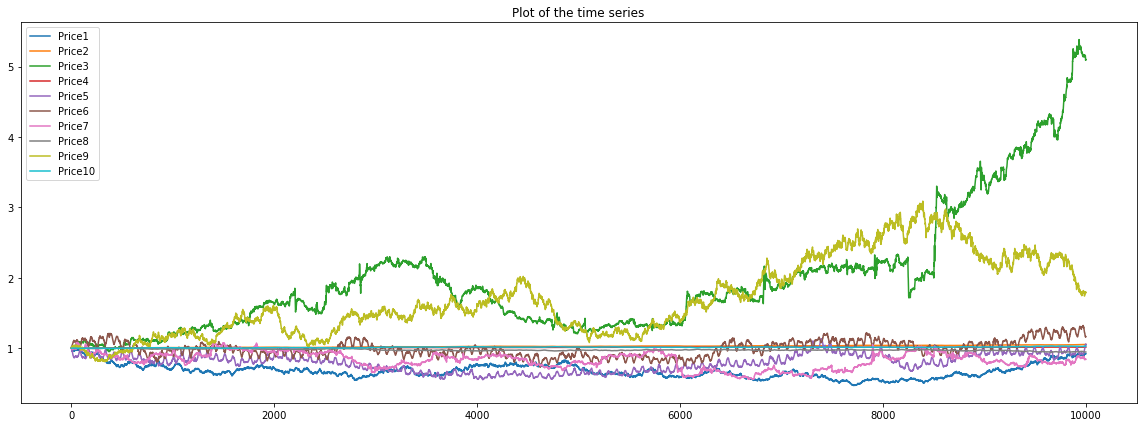

In [40]:
df_scaled_for_chart[df_scaled_for_chart.columns[1:]].plot(figsize=(20,7), title= 'Plot of the time series')

In [41]:
df[df.columns[1:]].astype('float64').corr()

,Price1,Price2,Price3,Price4,Price5,Price6,Price7,Price8,Price9,Price10
Price1,1.000000,-0.296821,0.086186,-0.436803,0.047705,0.146192,0.232243,-0.023810,-0.424355,0.032641
Price2,-0.296821,1.000000,0.737920,0.897376,0.147795,0.283958,-0.357583,-0.809558,0.820741,0.807994
Price3,0.086186,0.737920,1.000000,0.488079,0.411636,0.565307,-0.149280,-0.695923,0.623754,0.700645
Price4,-0.436803,0.897376,0.488079,1.000000,-0.023868,0.102101,-0.552542,-0.748508,0.695962,0.744292
Price5,0.047705,0.147795,0.411636,-0.023868,1.000000,0.565140,-0.015512,0.101206,0.292308,-0.096098
Price6,0.146192,0.283958,0.565307,0.102101,0.565140,1.000000,-0.097575,-0.138236,0.377805,0.145336
Price7,0.232243,-0.357583,-0.149280,-0.552542,-0.015512,-0.097575,1.000000,0.354720,-0.239804,-0.351391
Price8,-0.023810,-0.809558,-0.695923,-0.748508,0.101206,-0.138236,0.354720,1.000000,-0.540276,-0.999907
Price9,-0.424355,0.820741,0.623754,0.695962,0.292308,0.377805,-0.239804,-0.540276,1.000000,0.537940
Price10,0.032641,0.807994,0.700645,0.744292,-0.096098,0.145336,-0.351391,-0.999907,0.537940,1.000000


<AxesSubplot:>

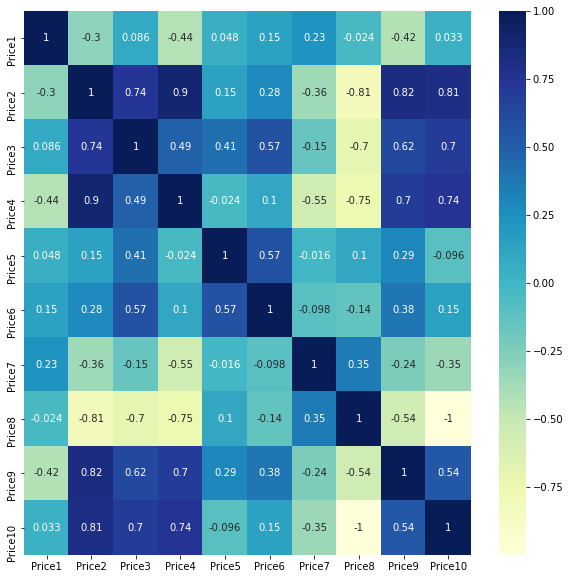

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (10,10))
sns.heatmap(df[df.columns[1:]].astype('float64').corr(), cmap="YlGnBu", annot=True)

# Observations on our starting dataset

From the correlation table I printed and plotted above we can observe that there are numerous couples with a relevant positive correlation so  the choice will be made depending on the cointegration test; 

Our strategy, in order to be profitable requires that the 2 time series are cointegrated considering that cointegration describes a long-term relationship between asset prices that we intend to exploit.

Cointegration can be seen as a measure of similarity of assets in terms of risk exposure profiles and the prices of cointegrated assets are tethered due to the stationarity of their spread.

# Choice of the (at least) 2 time series

In the following piece of code I perform a cointegration test and I filter out all the couples that don't have an Augmented Dickey Fuller test (to check if cointegrated) result below -3.4, that is the 1% confidence level value of the test and I also delist all the couples with a correlation coefficient in all the time period of less than 0.3 because of course we want time series correlated

Couple analysed: ('Price5', 'Price6')
Correlation coefficient between the 2 time series: 0.5651401862998241
ADF coefficient: -6.872163602350391
ADF table to define if series are cointegrated: {'1%': -3.431004228818807, '5%': -2.8618291302145686, '10%': -2.566923898875394}

Couple analysed: ('Price6', 'Price5')
Correlation coefficient between the 2 time series: 0.5651401862998241
ADF coefficient: -6.909635202641017
ADF table to define if series are cointegrated: {'1%': -3.431004228818807, '5%': -2.8618291302145686, '10%': -2.566923898875394}



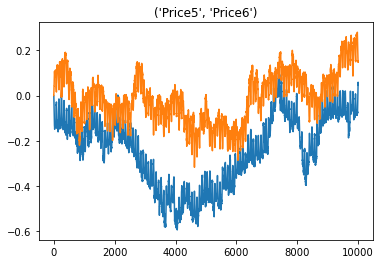

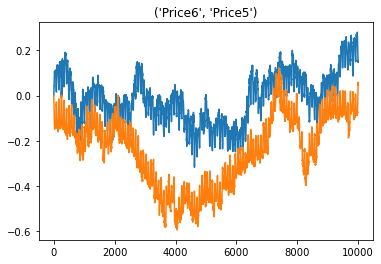

In [43]:
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
import itertools

combinations = itertools.permutations(df.columns[1:],2)
for i in list(combinations):
    a = i[0]
    b = i[1]
    model = sm.OLS(df[a].astype('float64'), df[b].astype('float64'))
    model = model.fit() 
    #print(model.params[0])
    spread = df[a].astype('float64') - (model.params[0] * df[b].astype('float64'))
    adf = adfuller(spread, maxlag = 1)
    if (adf[0] < -3.4) & (np.abs(np.corrcoef(df[a].astype('float64'), df[b].astype('float64'))[0][1]) > 0.3):
        s = np.corrcoef(df[a].astype('float64'), df[b].astype('float64'))[0][1]
        print('Couple analysed: {}'.format(i))
        print('Correlation coefficient between the 2 time series: {}'.format(s))
        print('ADF coefficient: {}'.format(adf[0]))
        print('ADF table to define if series are cointegrated: {}'.format(adf[4]))
        print('')
        plt.figure()
        plt.plot(np.log(df[a].astype('float64')))
        plt.plot(np.log(df[b].astype('float64')))
        plt.title(i)

# The best candidates considering the analysis we run are Price5 and Price6, they are cointegrated and highly correlated

So we proceed with the trade exploiting the assumption that the sprad between the 2 series is mean-reverting. 

In doing so we know already the quantities of each asset that we need to buy: these are given by the coefficient of the linear reg we run before regressing one time series on the other; last thing that remains to do is to decide in which of the two assets we go long and in which one we go short.  

Now I will plot the 2 time series and the spread that we will be trading:

Text(0.5, 1.0, 'Time series selected')

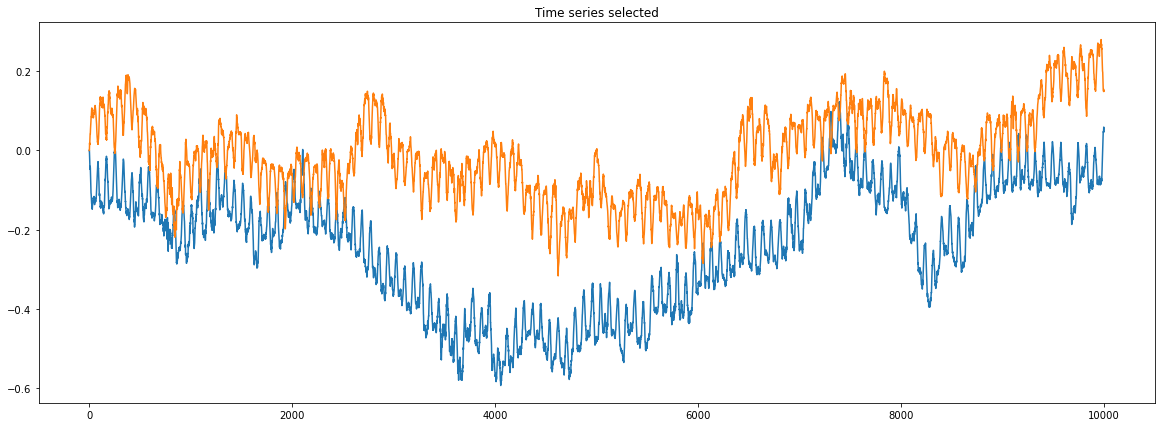

In [44]:
plt.figure(figsize=(20,7))
plt.plot(np.log(df['Price5'].astype('float64')))
plt.plot(np.log(df['Price6'].astype('float64')))
plt.title('Time series selected')

Text(0.5, 1.0, 'Spread and possible boundaries')

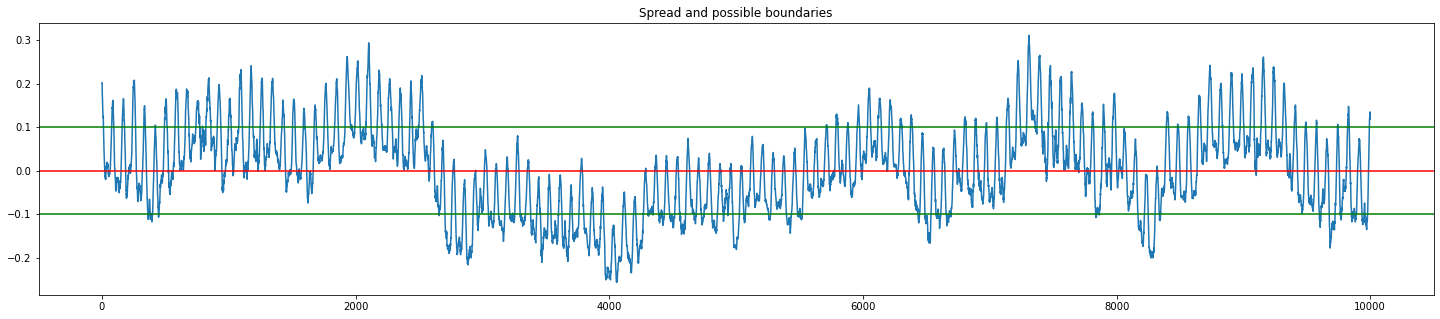

In [45]:
model = sm.OLS(df['Price5'].astype('float64'), df['Price6'].astype('float64'))
model = model.fit()
spread = df['Price5'].astype('float64') - model.params[0] * df['Price6'].astype('float64') 
plt.figure(figsize=(25,5))
plt.plot(spread)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.axhline(y = 0.1, color = 'g', linestyle = '-')
plt.axhline(y = -0.1, color = 'g', linestyle = '-')
plt.title('Spread and possible boundaries')

In [46]:
#model.summary()

We can clearly see that the spread is weak stationary observing the chart. Now we need to decide when to enter and exit the trade/strategy. We need to pick the boundaries so that our automated strategy can start when the spread hit the barrier (above or below) and terminates when the spread return to 0 (the long term average of the spread series).

Of course the tighter are the boundaries the more times the strategy will be performed and the lower the profitability will be for each time the trade is performed and concluded.

To wrap-up the trading strategy that we implement is:
    
    - in case Spread hit upper bound -> we sell 1 Unit of Price5 and buy 1*model.params[0] Units of Price6 and we close the position next time the spread is 0 
    
    - in case Spread hit lower bound -> we buy 1 Unit of Price5 and sell 1*model.params[0] Units of Price6 and we close the position next time the spread is 0 
    
Of course I am writing 1 unit but the volume depends on the choice of the trader.

Below I show a piece of code that perform the strategy as described (transaction costs and bid ask spreads are not considered but in real world are of course a key part in deciding the boundaries):

In [47]:
#The code below should run every millisecond to assess when the boundaries are hit and calculates backward the number of time strategy would have been performed in the past; 
#it would be easy to calculate also the profit but is not requested

in_strategy = False
in_long = False
in_short = False
volume = 1
boundary = [-0.1, 0.1]
times_strategy_performed = 0
strategy_enter = []
strategy_exit = []

for i in range(len(df.Dates)):
    
    spread = df['Price5'][i].astype('float64') - model.params[0] * df['Price6'].astype('float64') 
    
    if in_strategy == False and spread[i] <= boundary[0]:
        #we enter the strategy we buy 1 Unit of Price5 and sell 1*model.params[0] Units of Price6
        strat = volume*df['Price5'][i].astype('float64') - volume*model.params[0] * df['Price6'].astype('float64') 
        strategy_enter.append(strat)
        in_strategy = True
        in_long = True
    
    elif in_strategy == False and spread[i] >= boundary[1]:
        #we enter the strategy we sell 1 Unit of Price5 and buy 1*model.params[0] Units of Price6
        strat = -volume*df['Price5'][i].astype('float64') + volume*model.params[0] * df['Price6'].astype('float64')
        strategy_enter.append(strat)
        in_strategy = True
        in_short = True
    
    elif in_strategy == True and (spread[i] > (-1*1e-6) or spread[i] < (1/1e6)):
        #we exit the strategy reversing operation
        if in_long == True:
            strat = -volume*df['Price5'][i].astype('float64') + volume*model.params[0] * df['Price6'].astype('float64')
            strategy_exit.append(strat)
            in_long = False
        else:
            strat = volume*df['Price5'][i].astype('float64') - volume*model.params[0] * df['Price6'].astype('float64') 
            strategy_exit.append(strat)
            in_short = False
            
        in_strategy = False
        times_strategy_performed += 1


array1 = np.array(strategy_enter)
array2 = np.array(strategy_exit)
#The following if has the goal to discard the last entry value of the strategy if we are still into it
if len(array1) == len(array2):
    profit = np.subtract(array2, array1)
else:
    profit = np.subtract(array2, array1[0:-1])

print('The strategy would have been performed: {} times'.format(times_strategy_performed))  
print('The profit would have been: {} units (if prices are denominated in euro are euros)'.format(profit.sum()))

The strategy would have been performed: 1790 times
The profit would have been: 4474458.361963938 units (if prices are denominated in euro are euros)
